   ### ---------- CAPSTONE PROJECT: THE BATTLE OF THE NEIGHBORHOODS--------------

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

1. [Introduction: Business problem](#0)<br>
2. [Downloading and Prepping Data](#2)<br>
3. [Exploratory](#2)<br>
4. [Visualizing Data using Matplotlib](#4) <br>
5. [Bar Charts](#10) <br>
6. [Folium map](#11)<br>
</div>
<hr>

### 1.Introduction: Business Problem

The purpose of this project is to analyze the Boston Crime data report in 2019. This project will show different analysis using various types of plotting to demonstrate the cluster of crimes in specific district. 

This project more or less will help the people who want to relocate to Boston, at least they will some idea about the location they want to move in for safety concern. This analysis will show you detail of specific correlation number of crimes vs. district, offsense_code, time of the day, month...

###  2. Data Collection 

The data has been download from the https://www.kaggle.com/boston-crime-data. 
   

 It will show:
* The total number of crimes committed in different districts
* Area with most crimes are commited. 
   

##### Below is detail of the of the file

* INCIDENT_NUMBER:
* OFFENSE_CODE:
* OFFENSECODEGROUP:
* OFFENSE_DESCRIPTION:
* DISTRICT:
* REPORTING_AREA:
* SHOOTING:
* OCCURREDONDATE:
* YEAR:
* MONTH:
* DAYOFWEEK:
* HOUR:
* UCR_PART:
* STREET:
* LATITUDE:
* LONGITUDE:
* LOCATION:

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt 
%matplotlib inline

In [2]:
df = pd.read_csv('boston_crime.csv')

C:\Users\Bin-Bibo-Uno\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192082859,724,Auto Theft,AUTO THEFT,E18,519,NaN,2019-10-13 09:28:24,2019,10,Sunday,9,Part One,LINCOLN ST,42.259518,-71.121563,"(42.25951765, -71.12156299)"
1,I192082751,724,Auto Theft,AUTO THEFT,E18,493,NaN,2019-10-12 20:11:26,2019,10,Saturday,20,Part One,METROPOLITAN AVE,42.262092,-71.116710,"(42.26209214, -71.11670964)"
2,I192082680,727,Auto Theft,AUTO THEFT - LEASED/RENTED VEHICLE,D14,794,NaN,2019-10-12 15:12:43,2019,10,Saturday,15,Part One,ALLSTON ST,42.352375,-71.135096,"(42.35237455, -71.13509584)"
3,I192082577,724,Auto Theft,AUTO THEFT,D4,130,NaN,2019-10-12 04:41:52,2019,10,Saturday,4,Part One,SAINT JAMES AVE,42.349476,-71.076402,"(42.34947586, -71.07640150)"
4,I192079582,727,Auto Theft,AUTO THEFT - LEASED/RENTED VEHICLE,A15,47,NaN,2019-10-02 08:08:49,2019,10,Wednesday,8,Part One,N MEAD ST,42.381846,-71.066551,"(42.38184582, -71.06655134)"


### Selecting the crime in the year of 2019

In [4]:
df = df[df['YEAR'] == 2019]

In [5]:
df.shape

(73586, 17)

In [6]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192082859,724,Auto Theft,AUTO THEFT,E18,519,NaN,2019-10-13 09:28:24,2019,10,Sunday,9,Part One,LINCOLN ST,42.259518,-71.121563,"(42.25951765, -71.12156299)"
1,I192082751,724,Auto Theft,AUTO THEFT,E18,493,NaN,2019-10-12 20:11:26,2019,10,Saturday,20,Part One,METROPOLITAN AVE,42.262092,-71.116710,"(42.26209214, -71.11670964)"
2,I192082680,727,Auto Theft,AUTO THEFT - LEASED/RENTED VEHICLE,D14,794,NaN,2019-10-12 15:12:43,2019,10,Saturday,15,Part One,ALLSTON ST,42.352375,-71.135096,"(42.35237455, -71.13509584)"
3,I192082577,724,Auto Theft,AUTO THEFT,D4,130,NaN,2019-10-12 04:41:52,2019,10,Saturday,4,Part One,SAINT JAMES AVE,42.349476,-71.076402,"(42.34947586, -71.07640150)"
4,I192079582,727,Auto Theft,AUTO THEFT - LEASED/RENTED VEHICLE,A15,47,NaN,2019-10-02 08:08:49,2019,10,Wednesday,8,Part One,N MEAD ST,42.381846,-71.066551,"(42.38184582, -71.06655134)"


In [7]:
df.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [8]:
df1 = df[['INCIDENT_NUMBER', 'OFFENSE_CODE_GROUP','DISTRICT', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR',   'STREET', 'Lat', 'Long']]

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73586 entries, 0 to 426837
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   INCIDENT_NUMBER     73586 non-null  object 
 1   OFFENSE_CODE_GROUP  73586 non-null  object 
 2   DISTRICT            73244 non-null  object 
 3   YEAR                73586 non-null  int64  
 4   MONTH               73586 non-null  int64  
 5   DAY_OF_WEEK         73586 non-null  object 
 6   HOUR                73586 non-null  int64  
 7   STREET              72400 non-null  object 
 8   Lat                 68912 non-null  float64
 9   Long                68912 non-null  float64
dtypes: float64(2), int64(3), object(5)
memory usage: 6.2+ MB


In [10]:
df1.isnull().sum()

INCIDENT_NUMBER          0
OFFENSE_CODE_GROUP       0
DISTRICT               342
YEAR                     0
MONTH                    0
DAY_OF_WEEK              0
HOUR                     0
STREET                1186
Lat                   4674
Long                  4674
dtype: int64

In [11]:
df1.dropna(inplace=True)

C:\Users\Bin-Bibo-Uno\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
# to make sure there is no null or 0 values in the data set
df1.isnull().sum()

INCIDENT_NUMBER       0
OFFENSE_CODE_GROUP    0
DISTRICT              0
YEAR                  0
MONTH                 0
DAY_OF_WEEK           0
HOUR                  0
STREET                0
Lat                   0
Long                  0
dtype: int64

In [13]:
# check information of the entire data set
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68306 entries, 0 to 426837
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   INCIDENT_NUMBER     68306 non-null  object 
 1   OFFENSE_CODE_GROUP  68306 non-null  object 
 2   DISTRICT            68306 non-null  object 
 3   YEAR                68306 non-null  int64  
 4   MONTH               68306 non-null  int64  
 5   DAY_OF_WEEK         68306 non-null  object 
 6   HOUR                68306 non-null  int64  
 7   STREET              68306 non-null  object 
 8   Lat                 68306 non-null  float64
 9   Long                68306 non-null  float64
dtypes: float64(2), int64(3), object(5)
memory usage: 5.7+ MB


In [14]:
# reset the indexing after dropping null and 0 value
df1 = df1.reset_index(drop=True)


In [15]:
df1.head(20)

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,DISTRICT,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long
0,I192082859,Auto Theft,E18,2019,10,Sunday,9,LINCOLN ST,42.259518,-71.121563
1,I192082751,Auto Theft,E18,2019,10,Saturday,20,METROPOLITAN AVE,42.262092,-71.116710
2,I192082680,Auto Theft,D14,2019,10,Saturday,15,ALLSTON ST,42.352375,-71.135096
3,I192082577,Auto Theft,D4,2019,10,Saturday,4,SAINT JAMES AVE,42.349476,-71.076402
4,I192079582,Auto Theft,A15,2019,10,Wednesday,8,N MEAD ST,42.381846,-71.066551
5,I192078648,Investigate Property,B3,2019,9,Sunday,6,WILMORE ST,42.277964,-71.092463
6,I192078647,Investigate Person,A1,2019,9,Sunday,3,NASHUA ST,42.367690,-71.065863
7,I192078645,Verbal Disputes,B3,2019,9,Sunday,6,ASPINWALL RD,42.291816,-71.072441
8,I192078645,Vandalism,B3,2019,9,Sunday,6,ASPINWALL RD,42.291816,-71.072441
9,I192078642,Motor Vehicle Accident Response,D4,2019,9,Sunday,5,ALBANY ST,42.332419,-71.075013


## Exploratory 

Explore crime distribution in the Boston district to find the least  and extract the neighborhoods in that borough to find the 10 most common venues in each neighborhood.

#### Total Crimes in easch District

In [16]:
df1['DISTRICT'].value_counts()

B2     10931
C11     9136
D4      8636
B3      7967
A1      7348
C6      4980
D14     4299
E18     4154
E13     3836
E5      3003
A7      2701
A15     1315
Name: DISTRICT, dtype: int64

#### Total Crimes in each group

In [17]:
df1['OFFENSE_CODE_GROUP'].value_counts()

Motor Vehicle Accident Response              6976
Medical Assistance                           6215
Larceny                                      5660
Investigate Person                           4155
Other                                        3923
                                             ... 
Phone Call Complaints                           8
Explosives                                      6
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE       2
Biological Threat                               1
Manslaughter                                    1
Name: OFFENSE_CODE_GROUP, Length: 63, dtype: int64

#### CRIME DISTRIBUTED BY DISTRICT

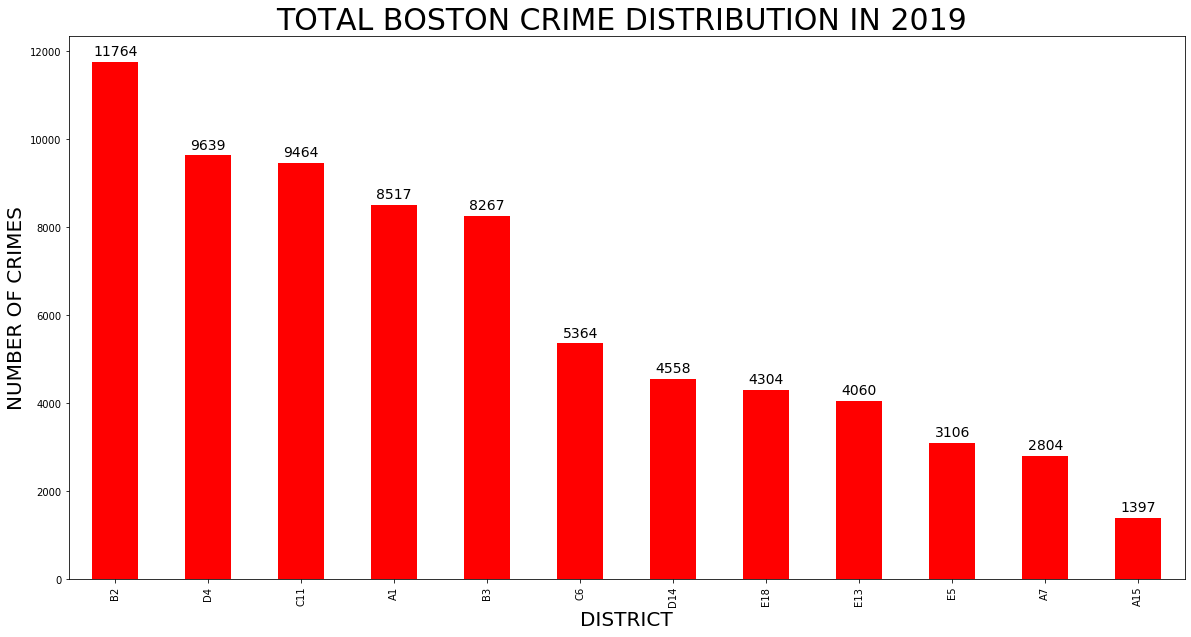

In [18]:
ax = df['DISTRICT'].value_counts().plot(kind='bar',color='red',figsize=(20,10))
ax.set_xlabel('DISTRICT',fontsize=20)
ax.set_ylabel('NUMBER OF CRIMES',fontsize=20)
ax.set_title('TOTAL BOSTON CRIME DISTRIBUTION IN 2019 ',fontsize=30)
# ax.set_xtickslabels('DAY OF WEEK',fontsize=20)

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

#### CRIME DISTRIBUTED BY DAY IN A WEEK

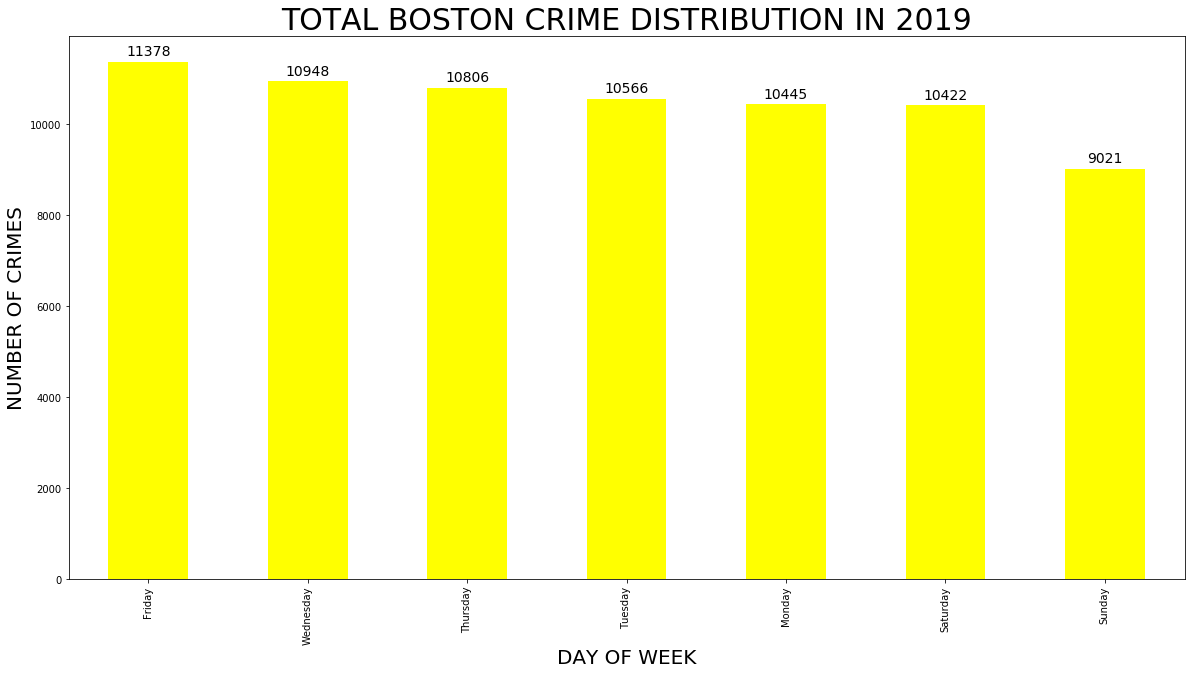

In [19]:
ax = df['DAY_OF_WEEK'].value_counts().plot(kind='bar',color='yellow',figsize=(20,10))
ax.set_xlabel('DAY OF WEEK',fontsize=20)
ax.set_ylabel('NUMBER OF CRIMES',fontsize=20)
ax.set_title('TOTAL BOSTON CRIME DISTRIBUTION IN 2019',fontsize=30)
# ax.set_xtickslabels('DAY OF WEEK',fontsize=20)

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

#### CRIME DISTRIBUTED BY TYPE

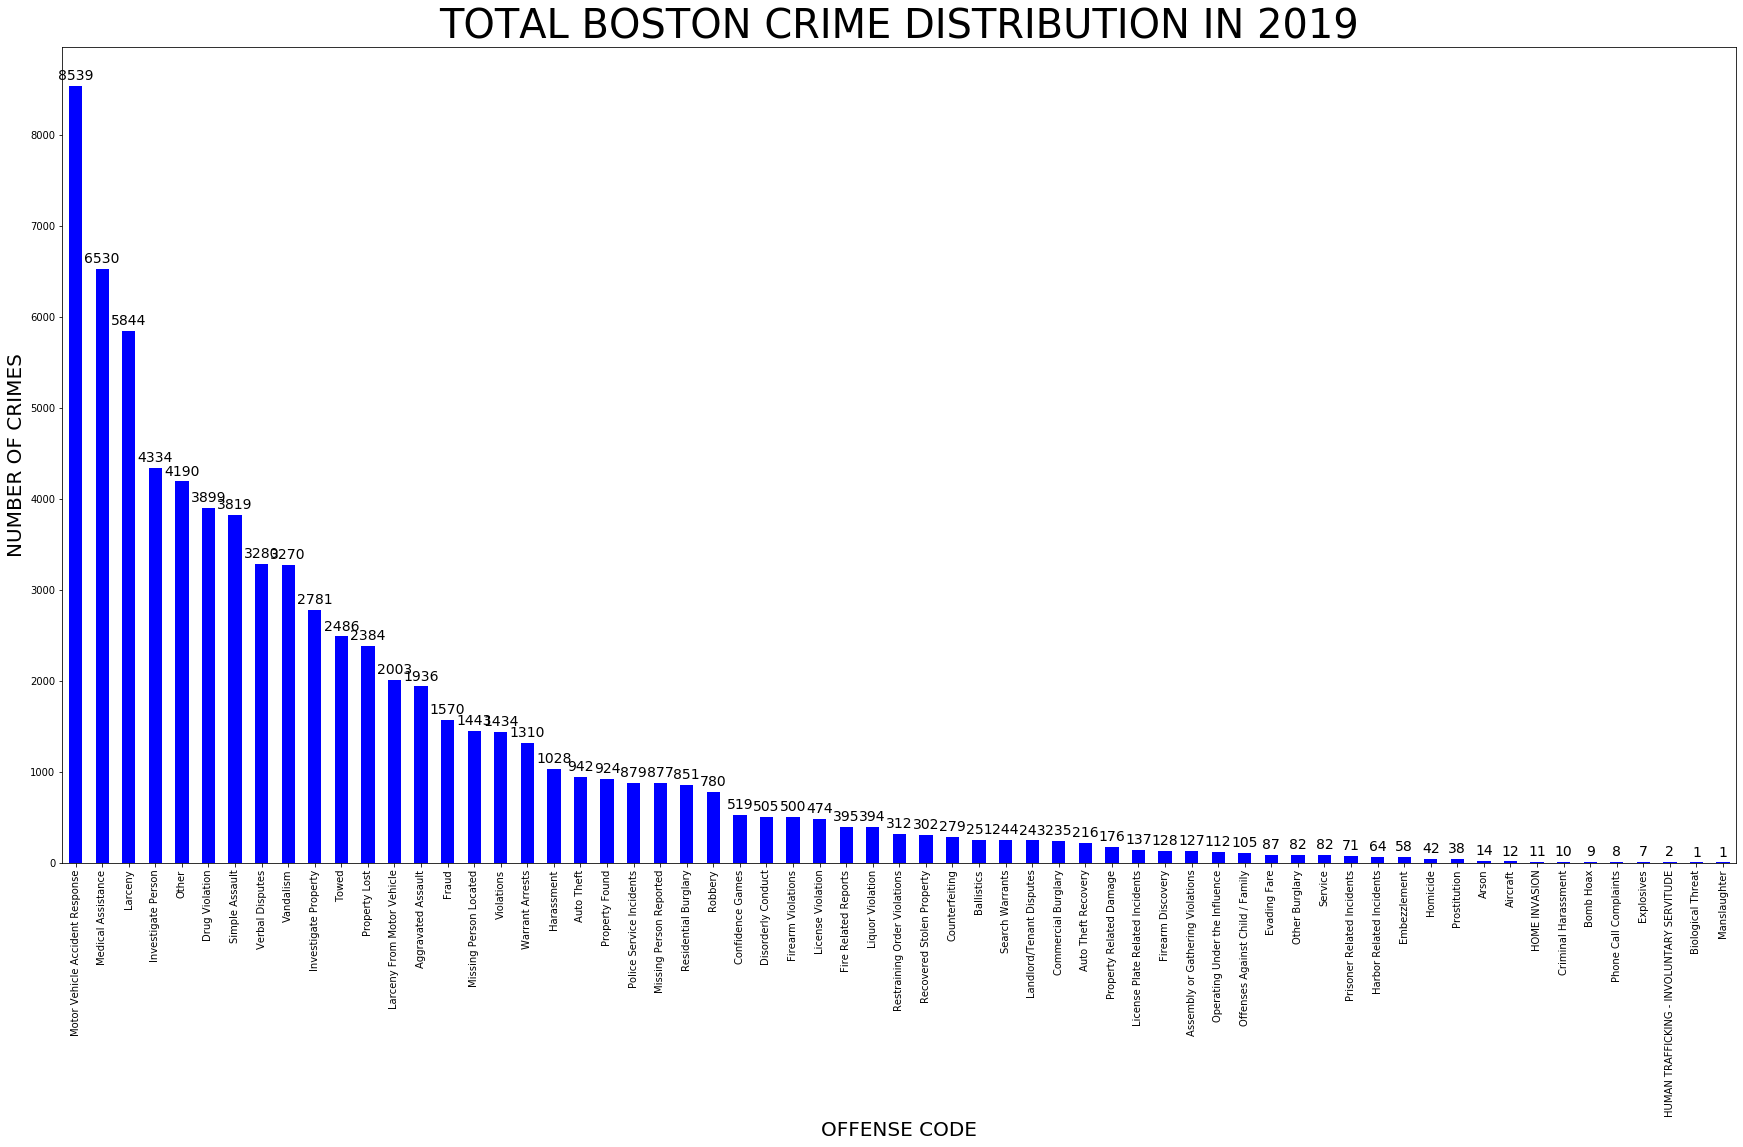

In [20]:
ax = df['OFFENSE_CODE_GROUP'].value_counts().plot(kind='bar',color='blue',figsize=(30,15))
ax.set_xlabel('OFFENSE CODE',fontsize=20)
ax.set_ylabel('NUMBER OF CRIMES',fontsize=20)
ax.set_title('TOTAL BOSTON CRIME DISTRIBUTION IN 2019',fontsize=40)
# ax.set_xtickslabels('DAY OF WEEK',fontsize=20)

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

#### CRIME DISTRIBUTED BY HOUR

Text(0.5, 1.0, 'TOTAL BOSTON CRIME DISTRIBUTION IN 2019')

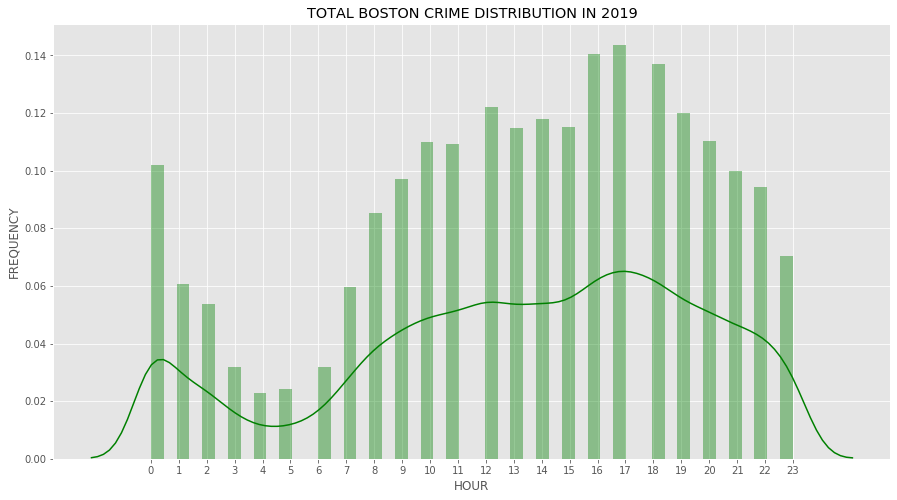

In [88]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,8))
sns.distplot(df['HOUR'],color='green')
plt.xlabel('HOUR')
plt.ylabel('FREQUENCY')
plt.xticks(list(range(24)))
plt.title('TOTAL BOSTON CRIME DISTRIBUTION IN 2019')

In [89]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [ ]:
df2 = df1.sort_values(by=['DISTRICT']).drop_duplicates(subset=['DISTRICT'])

In [ ]:
df2

## Boston at district E18 and Lincoln Street

In [116]:
latitude = 42.374795
longitude = -71.066009

In [117]:

Boston_district_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around Ecco


# add Ecco as a red circle mark
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    popup='Ecco',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(Boston_district_map)


# add popular spots to the map as blue circle markers
for latitude, longitude, label in zip(df2['Lat'], df2['Long'], df2['DISTRICT']):
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(Boston_district_map)

# display map
Boston_district_map


## Conclusion

A15 is the safest district in Boston in 2019